In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/c7/n6xdt4qn2ps77x3wbpyn1yfr0000gn/T/ipykernel_41575/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Importing the dataset  
df = pd.read_csv('/Users/deogirekartik/Vscode/Technical Seminar/datset/heart_attack_prediction_dataset.csv')

In [4]:
# First 5 observations from the dataset
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [5]:
# Number of Rows and column in dataset
df.shape

(8763, 26)

In [6]:
# A summary of basic statistical measures for each numerical column in dataset
Summary  = df.describe()
print(Summary)

               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

In [7]:
# Datatype of each column in dataset
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [8]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
8758    False
8759    False
8760    False
8761    False
8762    False
Length: 8763, dtype: bool

In [9]:
# Checking missing value in the dataset 
missing_values = df.isnull().sum()
print(missing_values)

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


<Axes: >

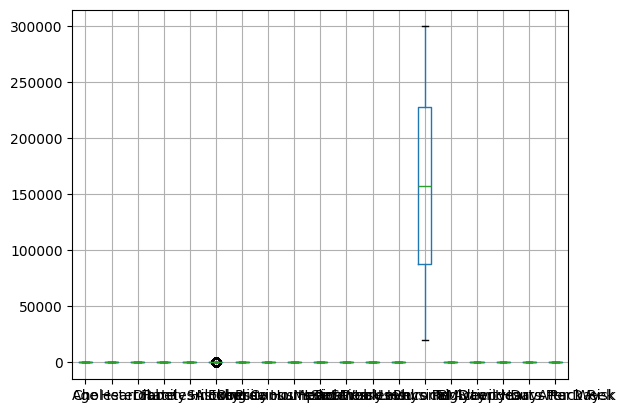

In [10]:
df.boxplot()



In [11]:
outliers = []
def detect_outliers(df) :
    threshold = 3
    mean = np.std(df)
    for i in df :
        z_score  =(i-mean)/std
        if np.abs(z_score) . threshold :
            outliers.append(i)
            return outliers

In [13]:
# For feature selection first we have split our data into train and test

from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.22)

## Select Percentile 


In [16]:
from sklearn.feature_selection import SelectPercentile, f_classif
import numpy as np

# Assuming X and y are already defined

X_numerical = X.select_dtypes(include='float64')
X_numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.nan, np.finfo(np.float64).max], 1, inplace=True)
X_numerical.replace([np.nan, np.finfo(np.float64).max], 1e6, inplace=True)

selector = SelectPercentile(score_func=f_classif, percentile=10)
X_selected = selector.fit_transform(X_numerical, y)

# Get selected feature names based on the selector
selected_feature_names = X_numerical.columns[selector.get_support()]

print("Selected Feature Names:", selected_feature_names)


Selected Feature Names: Index(['Exercise Hours Per Week'], dtype='object')


## Threshold Variance

In [18]:
X_numeric = X.apply(pd.to_numeric, errors='coerce')
feature_variances = X_numeric.var()
max_variance = feature_variances.max()
print("Maximum Variance Across Features:", max_variance)

Maximum Variance Across Features: 6492361373.358371


In [20]:
from sklearn.feature_selection import VarianceThreshold

X_numerical = X.select_dtypes(include='float64')
selector = VarianceThreshold(threshold=6)
X_selected = selector.fit_transform(X_numeric)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_selection/_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [21]:
selected_features_indices = selector.get_support()
selected_feature_names = X.columns[selected_features_indices]

print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
       'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
       'Triglycerides'],
      dtype='object')


## SelectKbest


In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

X_numerical = X.select_dtypes(include=['float64', 'int64'])
X_numerical.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with missing values in both X_numerical and y
X_numerical = X_numerical.dropna()
y = y[X_numerical.index]

selector = SelectKBest(score_func=f_classif, k=1)
X_selected = selector.fit_transform(X_numerical, y)


In [23]:
selected_features_indices = selector.get_support()
selected_feature_names = X_numerical.columns[selected_features_indices]

print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['Cholesterol'], dtype='object')
